In [1]:
import tensorflow as tf
import deepchem as dc
from deepchem.utils.data_utils import load_from_disk
import train_HIV
from sklearn.model_selection import train_test_split

dataset_file= "HIV.csv"

dataset = load_from_disk(dataset_file)

featurizer = dc.feat.CircularFingerprint(size=1024)
loader = dc.data.CSVLoader(tasks=["HIV_active"], smiles_field="smiles", featurizer=featurizer)
dataset = loader.featurize(dataset_file)

Num_layer = 2
dim = [32,64]

#####  Data splitting into test 2: train 8
X_train, X_test, y_train, y_test = train_test_split(dataset.X, dataset.y, test_size=0.2)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

model = train_HIV.train((X_train, X_test, y_train, y_test), Num_layer, dim)



smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.
C:\Users\USER\anaconda3\envs\myenv\lib\site-packages\deepchem\data\data_loader.py:163: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  "featurize() will be removed in DeepChem 3.0", FutureWarning)
[17:58:01] WARNING: not removing hydrogen atom without neighbors
[17:58:01] WARNING: not removing hydrogen atom without neighbors


Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

944/944 [==============================] - 1s 1ms/step - loss: 0.1603 - accuracy: 0.9595 - val_loss: 0.1153 - val_accuracy: 0.9681
Epoch 2/50
944/944 [==============================] - 1s 1ms/step - loss: 0.1182 - accuracy: 0.9676 - val_loss: 0.1044 - val_accuracy: 0.9726
Epoch 3/50
944/944 [==============================] - 1s 1ms/step - loss: 0.1047 - accuracy: 0.9721 - val_loss: 0.1020 - val_accuracy: 0.9738
Epoch 4/50
944/944 [==============================] - 1s 1ms/step - loss: 0.0944 -

In [2]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)
print('model Accuracy:', test_acc)

262/262 [==============================] - 0s 874us/step - loss: 0.1188 - accuracy: 0.9709
model Accuracy: 0.9708935022354126


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  32800     
_________________________________________________________________
dense_1 (Dense)              multiple                  33        
Total params: 32,833
Trainable params: 32,833
Non-trainable params: 0
_________________________________________________________________


In [4]:
from sklearn.metrics import roc_curve, auc

prediction= model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("\nHighest Accuracy: %f\nHighest AUC: %f" % (test_acc, auc(fpr, tpr)))


Highest Accuracy: 0.970894
Highest AUC: 0.798847


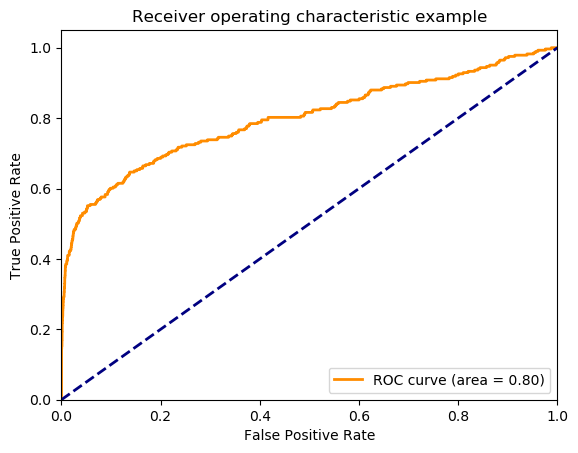

In [5]:
#####  ROC curve plotting
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()